## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

## An introduction to matplotlib

### The basics

In [2]:
fb = pd.read_csv(
    '../data/fb_stock_prices_2018.csv',
    index_col='date', parse_dates=True
)

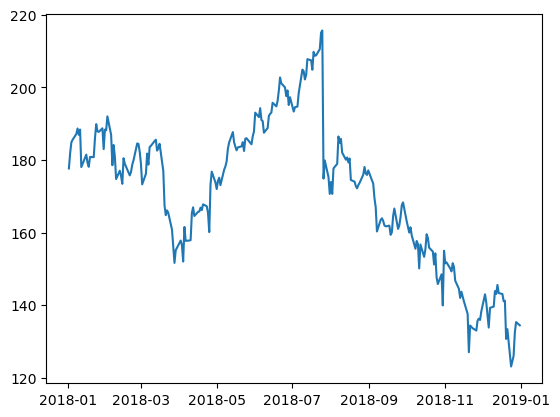

In [3]:
plt.plot(fb.index, fb.open)
# plt.show()

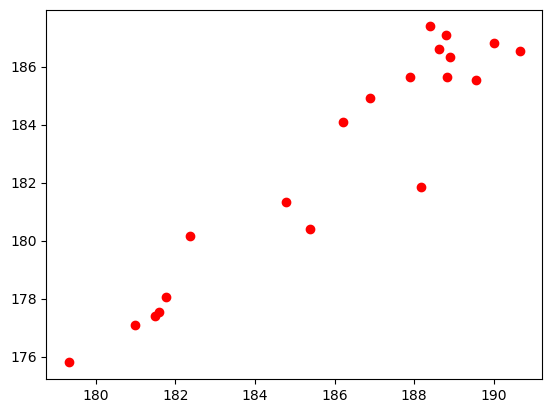

In [4]:
plt.plot('high', 'low', 'or', data=fb.head(20))

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <BarContainer object of 10 artists>)

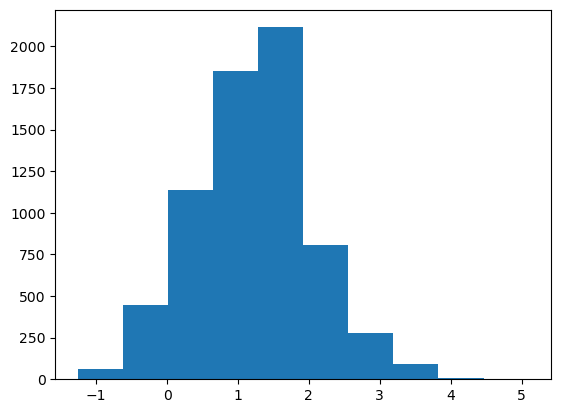

In [5]:
quakes = pd.read_csv('../data/earthquakes.csv')
plt.hist(quakes.query('magType == "ml"').mag)

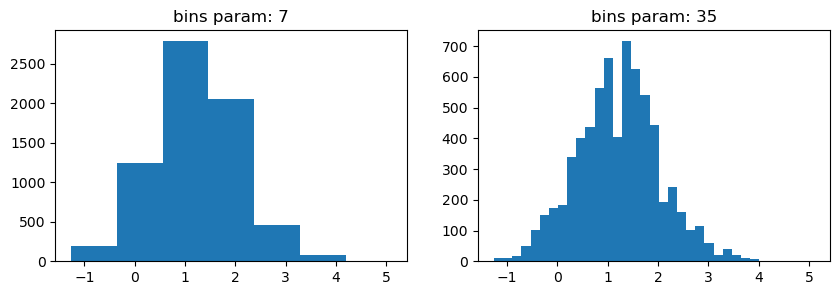

In [6]:
x = quakes.query('magType == "ml"').mag 
fig, axes = plt.subplots(1, 2, figsize=(10,3))
for ax, bins in zip(axes, [7, 35]):
  ax.hist(x, bins=bins)
  ax.set_title(f'bins param: {bins}')

### Plot components

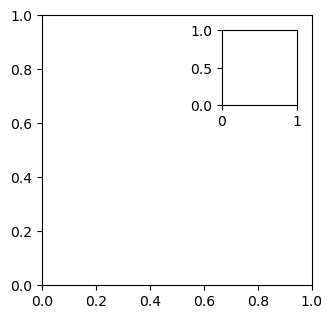

In [7]:
fig = plt.figure(figsize=(3,3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])

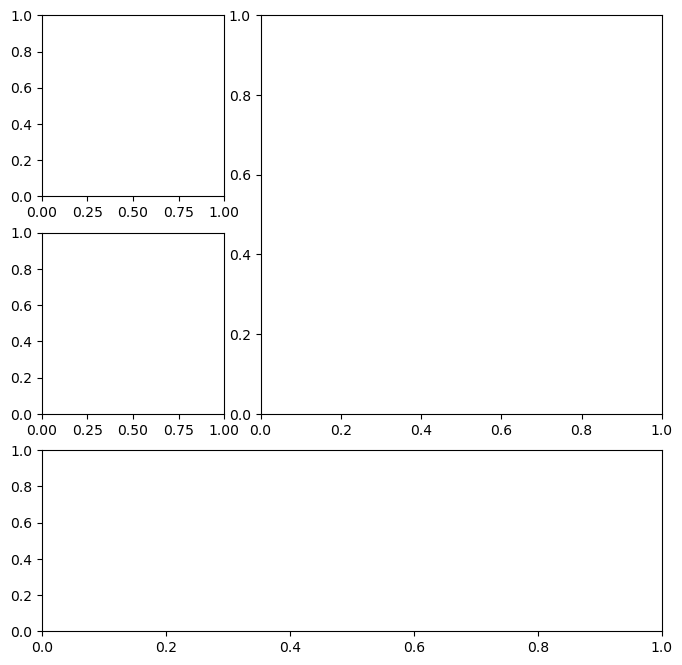

In [8]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(3,3)
top_left = fig.add_subplot(gs[0,0])
mid_left = fig.add_subplot(gs[1,0])
top_right = fig.add_subplot(gs[:2, 1:])
bottom = fig.add_subplot(gs[2,:])
# fig.savefig('empty.png')

In [9]:
plt.close('all')

### Additional Options

In [10]:
fig = plt.figure(figsize=(10,4))

<Figure size 1000x400 with 0 Axes>

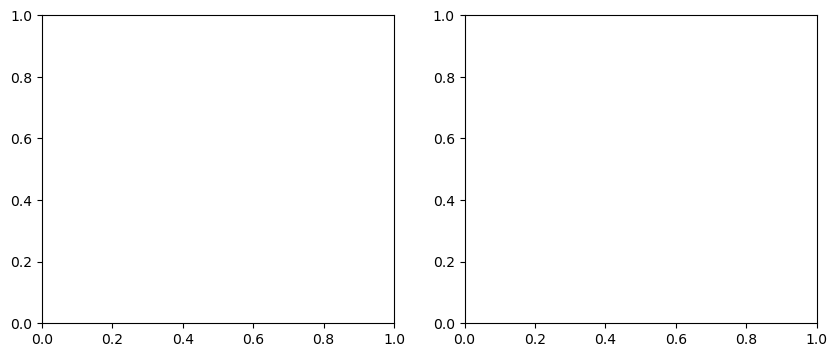

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

## Plotting with pandas

In [12]:
covid = pd.read_csv('../data/covid19_cases.csv').assign(
  date=lambda df_: pd.to_datetime(df_.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
  'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

### Evolution over time

<AxesSubplot: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

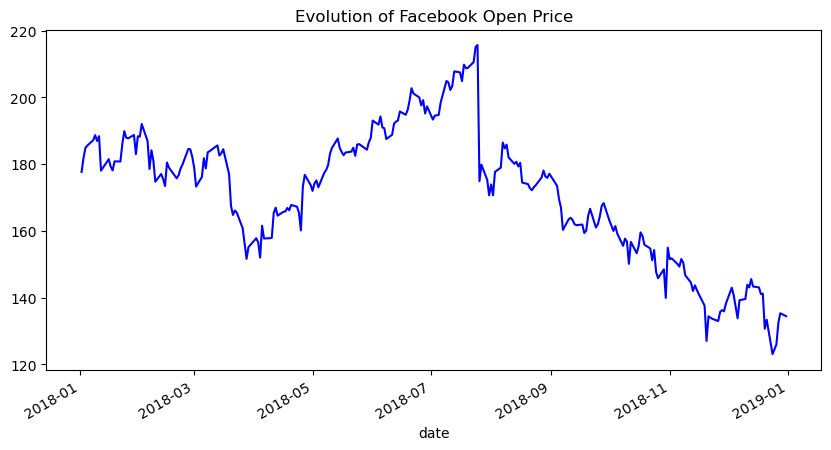

In [13]:
fb.plot(
  kind='line', y='open', figsize=(10, 5), style='-b',
  legend=False, title='Evolution of Facebook Open Price'
)

<AxesSubplot: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

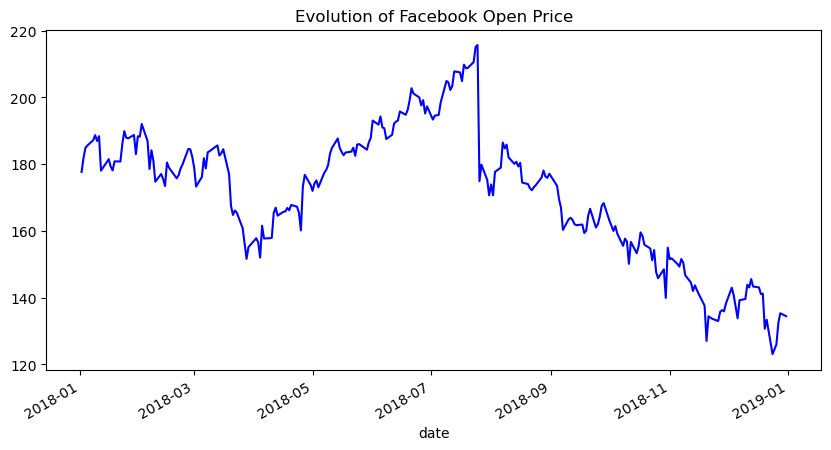

In [14]:
fb.plot(
  kind='line', y='open', figsize=(10, 5),
  color='blue', linestyle='solid',
  legend=False, title='Evolution of Facebook Open Price'
)

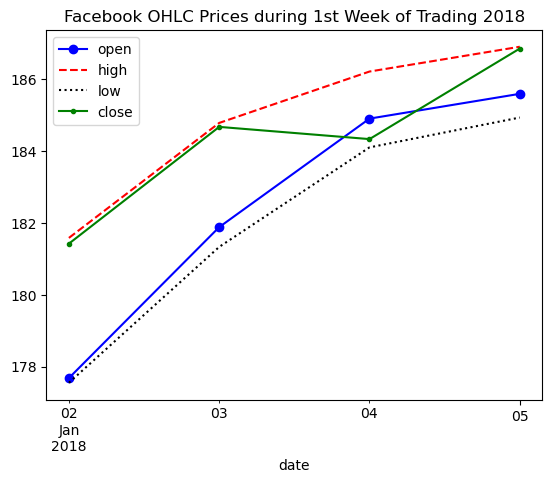

In [15]:
fb.first('1W').plot(
  y=['open', 'high', 'low', 'close'],
  style=['o-b', '--r', ':k', '.-g'],
  title='Facebook OHLC Prices during '
  '1st Week of Trading 2018'
).autoscale()

array([[<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>]],
      dtype=object)

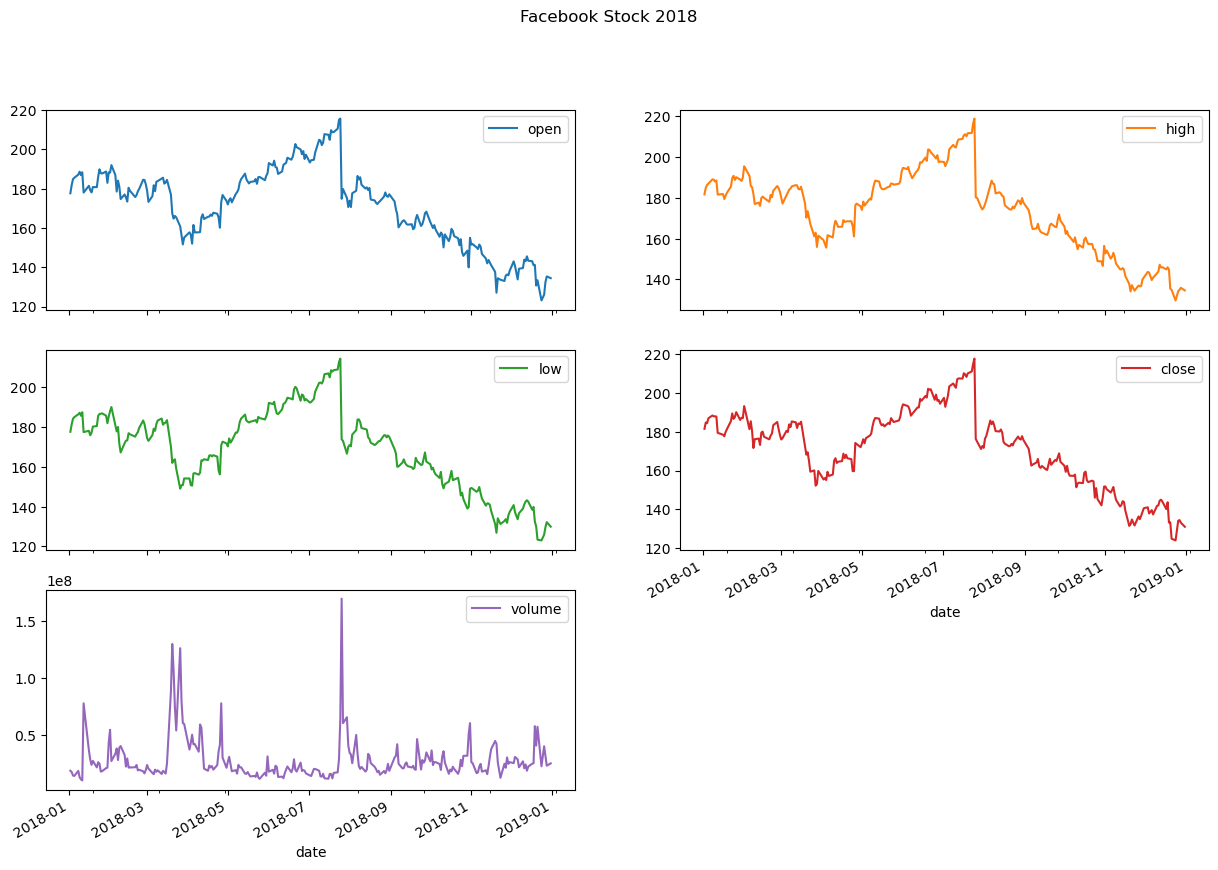

In [16]:
fb.plot(
  kind='line', subplots=True, layout=(3, 2),
  figsize=(15, 10), title='Facebook Stock 2018'
)

In [17]:
new_cases_rolling_average = covid.pivot_table(
  index=covid.index,
  columns='countriesAndTerritories',
  values='cases'
).rolling(7).mean()

<AxesSubplot: xlabel='date'>

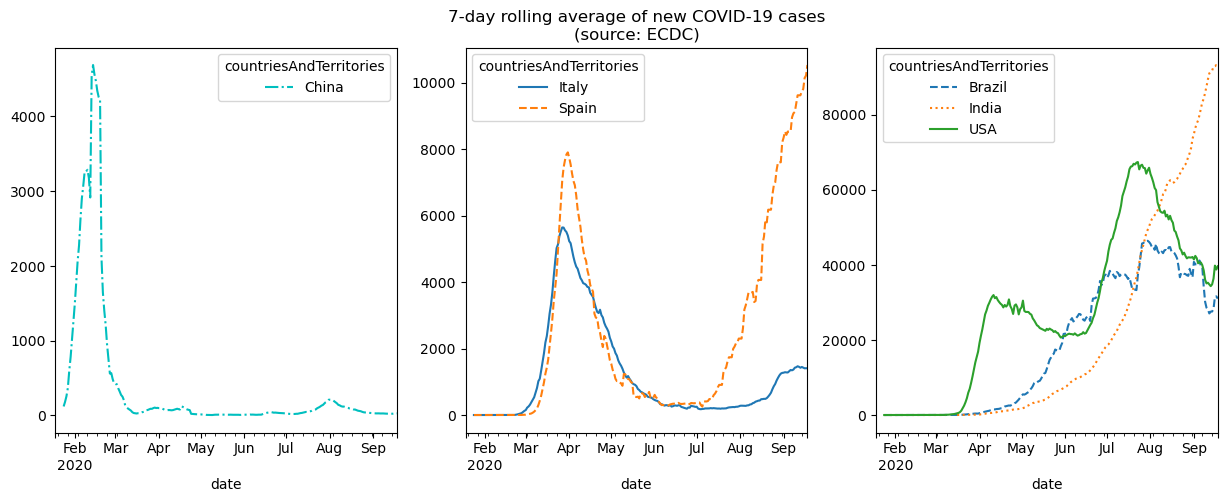

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
new_cases_rolling_average[['China']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['Italy', 'Spain']].plot(
  ax=axes[1], style=['-', '--'],
  title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Brazil', 'India', 'USA']].plot(
  ax=axes[2], style=['--', ':', '-']
)

<AxesSubplot: title={'center': '7-day rolling average of new COVID-19 cases\n(source: ECDC)'}, xlabel='date'>

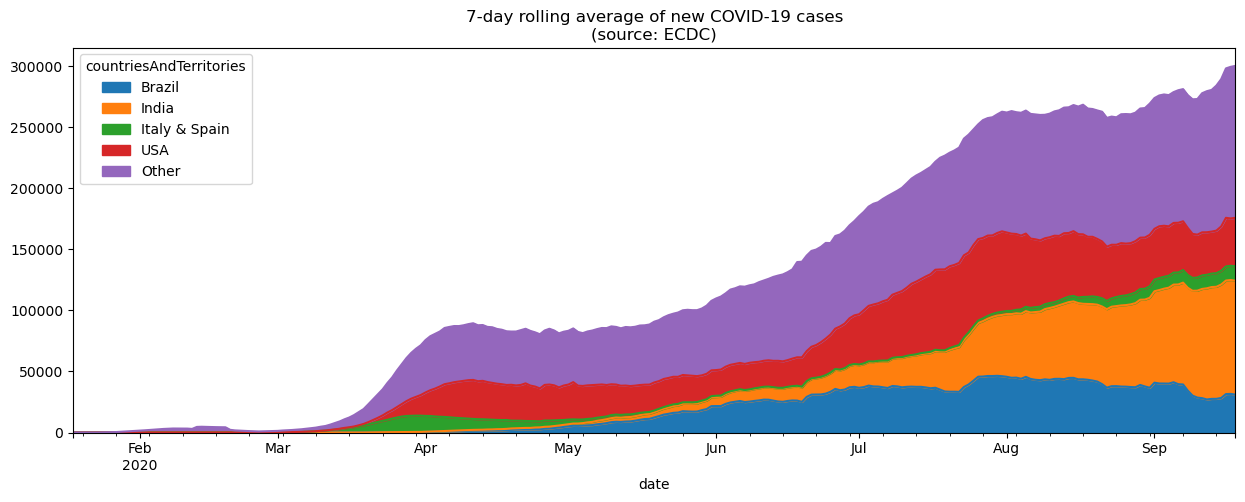

In [19]:
cols = [
  col for col in new_cases_rolling_average.columns
  if col not in [
    'USA', 'Brazil', 'India', 'Italy & Spain'
  ]
]

new_cases_rolling_average.assign(
  **{'Italy & Spain': lambda x: x.Italy + x.Spain}
).sort_index(axis=1).assign(
  Other=lambda x: x[cols].sum(axis=1)
).drop(columns=cols).plot(
  kind='area', figsize=(15,5),
  title='7-day rolling average of new '
  'COVID-19 cases\n(source: ECDC)'
)

<AxesSubplot: xlabel='date'>

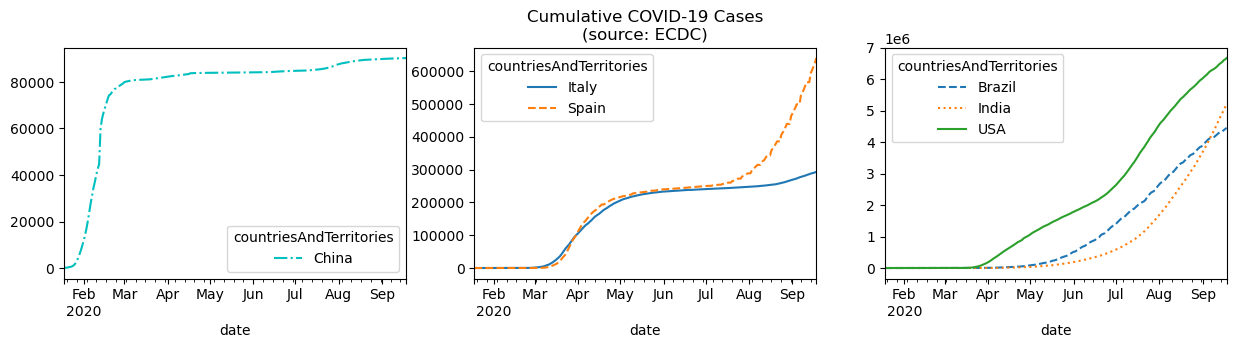

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15,3))
cumulative_covid_cases = covid.groupby(
  ['countriesAndTerritories', pd.Grouper(freq='1D')]
).cases.sum().unstack(0).apply('cumsum')
cumulative_covid_cases[['China']]\
  .plot(ax=axes[0], style='-.c')
cumulative_covid_cases[['Italy', 'Spain']].plot(
  ax=axes[1], style=['-', '--'],
  title='Cumulative COVID-19 Cases\n(source: ECDC)'
)
cumulative_covid_cases[['Brazil', 'India', 'USA']]\
  .plot(ax=axes[2], style=['--', ':', '-'])

### Relationship between variables

<AxesSubplot: title={'center': 'Facebook Daily High - Low vs. Volume Traded'}, xlabel='volume', ylabel='max_abs_change'>

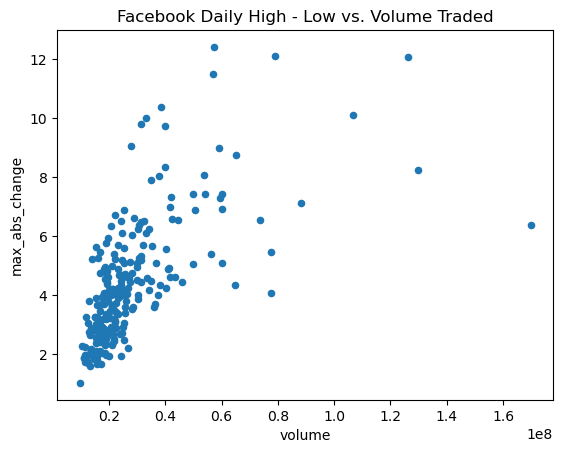

In [21]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. Volume Traded'
)

<AxesSubplot: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

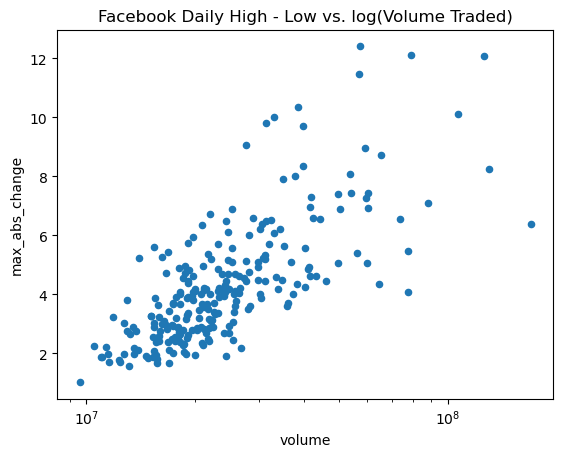

In [22]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    logx=True
)

<AxesSubplot: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

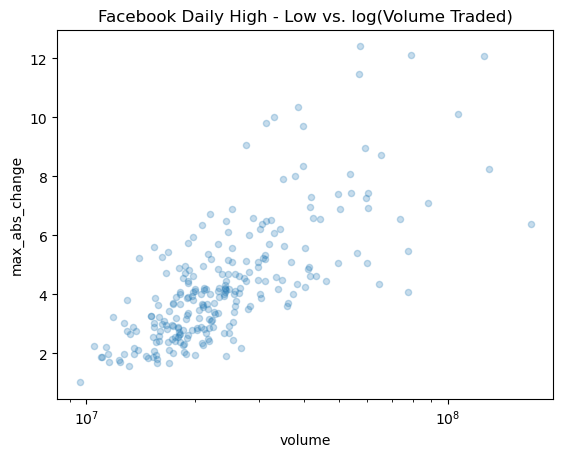

In [23]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    logx=True, alpha=0.25
)

<AxesSubplot: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='log_volume', ylabel='max_abs_change'>

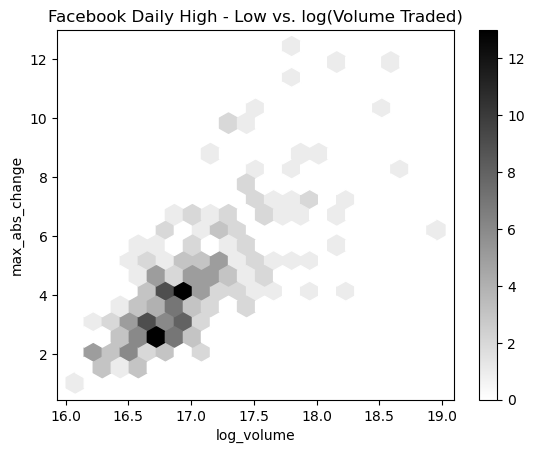

In [24]:
fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).plot(
    kind='hexbin', 
    x='log_volume', 
    y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    colormap='gray_r',
    gridsize=20,
    sharex=False
)

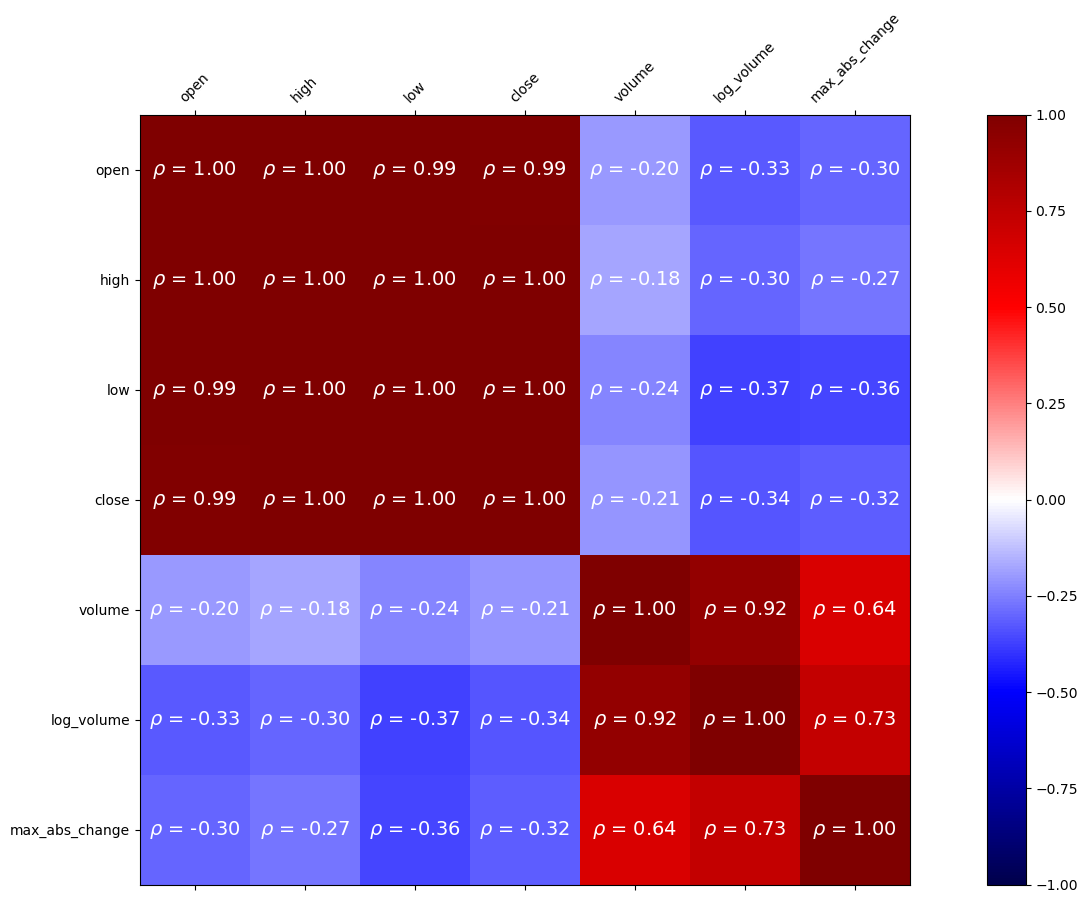

In [25]:
fig, ax = plt.subplots(figsize=(20,10))

fb_corr = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr()

im = ax.matshow(fb_corr, cmap='seismic')
im.set_clim(-1,1)
fig.colorbar(im)

labels = [col.lower() for col in fb_corr.columns]
ax.set_xticks(ax.get_xticks() [1:-1])
ax.set_xticklabels(labels, rotation=45)
ax.set_yticks(ax.get_yticks() [1:-1])
ax.set_yticklabels(labels)

for (i,j), coef in np.ndenumerate(fb_corr):
    ax.text(
        i, j, fr'$\rho$ = {coef:.2f}',
        ha='center', va='center',
        color='white', fontsize=14
    )

### Distributions

Text(0.5, 0, 'Volume traded')

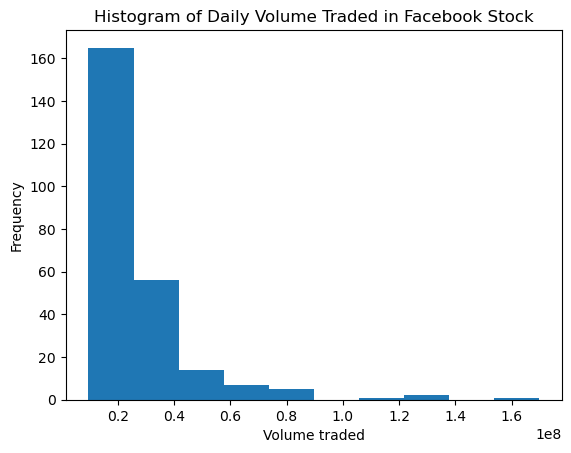

In [26]:
fb.volume.plot(
    kind='hist',
    title='Histogram of Daily Volume Traded in Facebook Stock'
)
plt.xlabel('Volume traded')

Text(0.5, 0, 'magnitude')

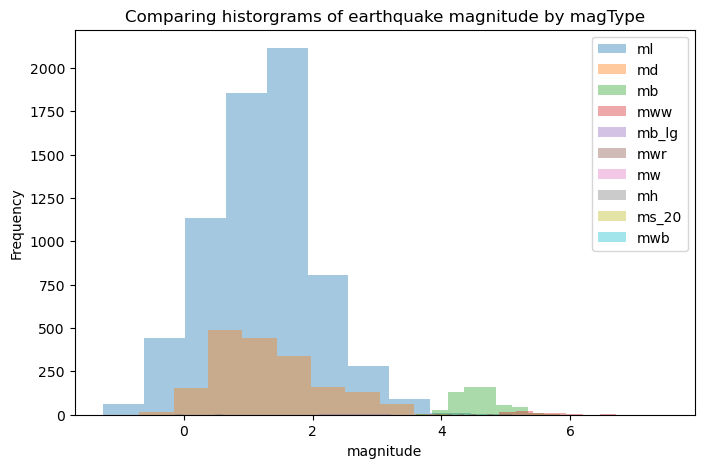

In [27]:
fig, axes = plt.subplots(figsize=(8, 5))

for magtype in quakes.magType.unique():
    data = quakes.query(f'magType == "{magtype}"').mag 
    if not data.empty:
        data.plot(
            kind='hist',
            ax=axes,
            alpha=0.4,
            label=magtype,
            legend=True,
            title='Comparing historgrams of earthquake magnitude by magType'
        )
plt.xlabel('magnitude')

Text(0.5, 0, 'Price ($)')

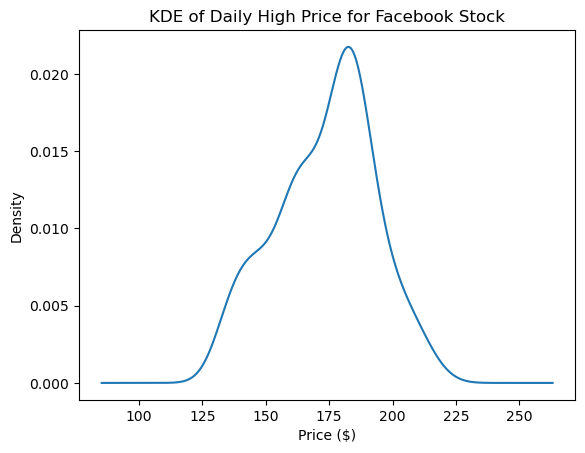

In [28]:
fb.high.plot(
    kind='kde',
    title='KDE of Daily High Price for Facebook Stock'
)
plt.xlabel('Price ($)')

Text(0.5, 0, 'Price ($)')

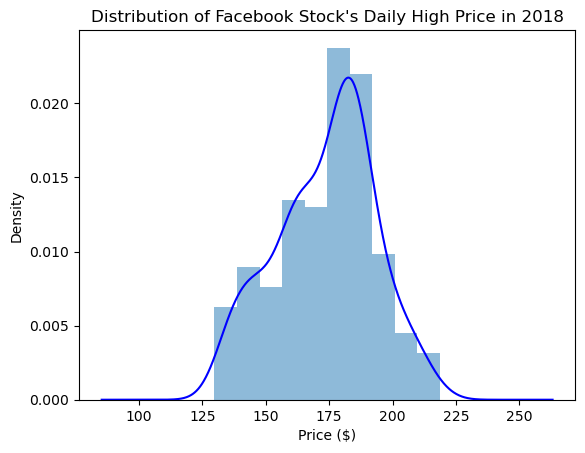

In [29]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(
    ax=ax, kind='kde', color='blue',
    title='Distribution of Facebook Stock\'s Daily High Price in 2018'
)
plt.xlabel('Price ($)')

Reference for CDF's:  https://www.itl.nist.gov/div898/handbook/eda/section3/eda362.htm

Text(0.5, 1.0, 'ECDF of earthquake magnitude with magType ml')

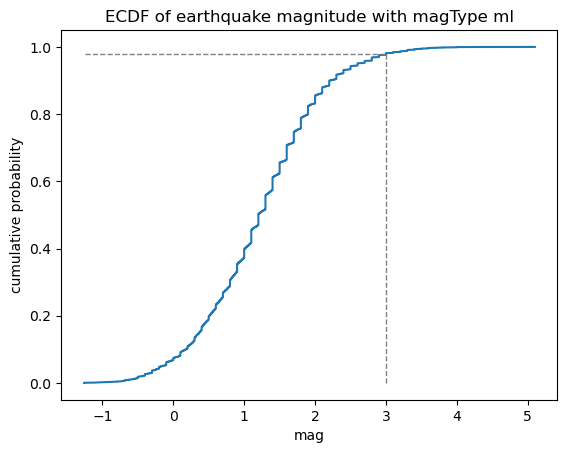

In [30]:
ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

plt.xlabel('mag')
plt.ylabel('cumulative probability')

plt.vlines(x=3, ymin=0, ymax=0.98, colors='gray', linestyles='--',
           linewidth=1)
plt.hlines(y=0.98, xmin=-1.25, xmax=3, colors='gray', linestyles='--',
           linewidth=1)

plt.title('ECDF of earthquake magnitude with magType ml')

In [36]:
np.mean(ecdf.x <= 3)

0.9816284538506761

In [38]:
len(ecdf.y)

6804

Text(0, 0.5, 'price ($)')

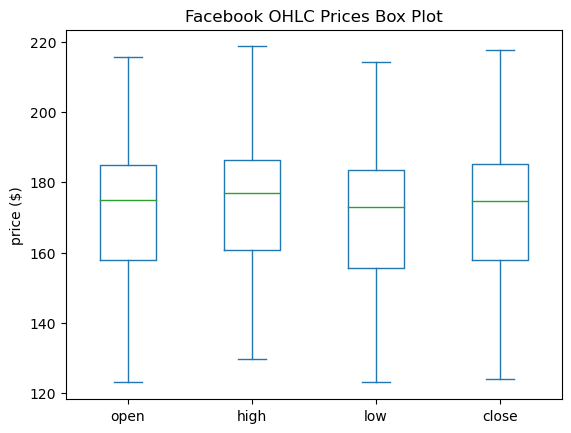

In [39]:
fb.iloc[:, :4].plot(
    kind='box',
    title='Facebook OHLC Prices Box Plot'
)
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

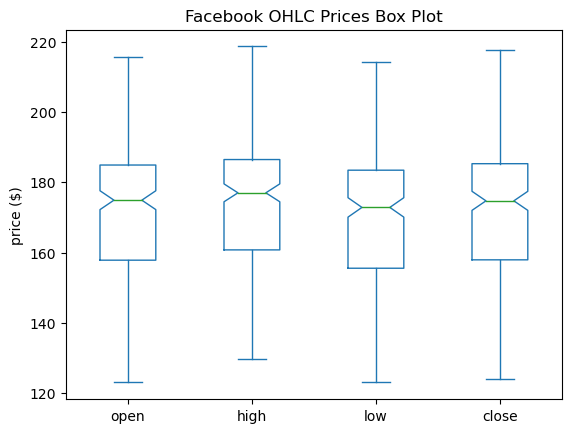

In [40]:
fb.iloc[:, :4].plot(
    kind='box',
    title='Facebook OHLC Prices Box Plot',
    notch=True
)
plt.ylabel('price ($)')

Text(0.5, 1.1, 'Facebook OHLC Box Plots by Volume Traded')

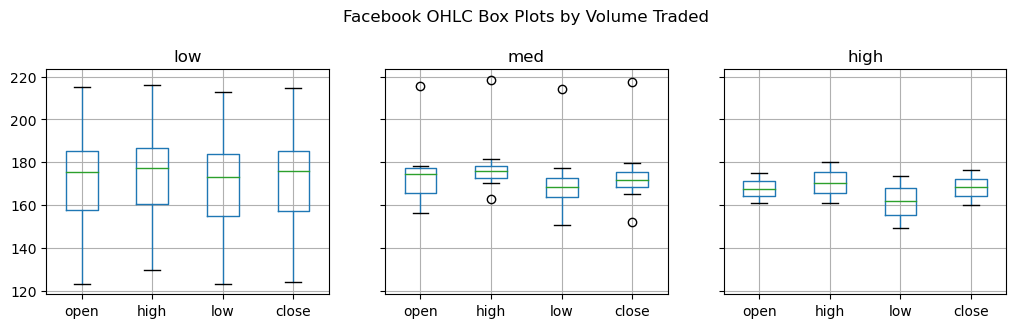

In [41]:
fb.assign(
    volume_bin = pd.cut(fb.volume, 3, labels=['low','med','high'])
).groupby('volume_bin').boxplot(
    column=['open', 'high', 'low', 'close'],
    layout=(1,3), figsize=(12,3)
)
plt.suptitle(
    'Facebook OHLC Box Plots by Volume Traded', y=1.1
)

Text(0, 0.5, 'magnitude')

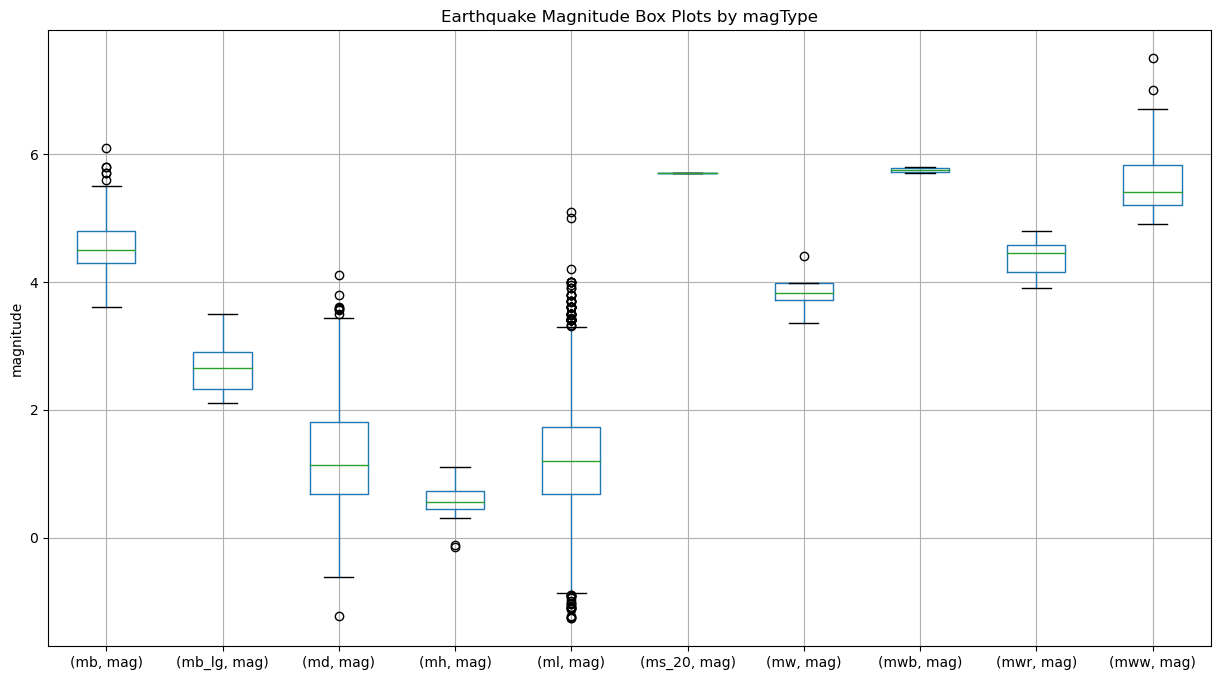

In [44]:
quakes[['mag', 'magType']].groupby('magType').boxplot(
    figsize=(15,8), subplots=False
)
plt.title('Earthquake Magnitude Box Plots by magType')
plt.ylabel('magnitude')

### Counts and frequencies

In [63]:
quakes.parsed_place.value_counts()[14::-1,]

Wyoming                 42
Canada                  55
Japan                   57
Dominican Republic      57
Fiji                    61
Utah                    67
Idaho                   71
Indonesia              147
Washington             157
Montana                204
Puerto Rico            216
Hawaii                 367
Nevada                 681
California            2861
Alaska                3665
Name: parsed_place, dtype: int64

Text(0.5, 0, 'earthquakes')

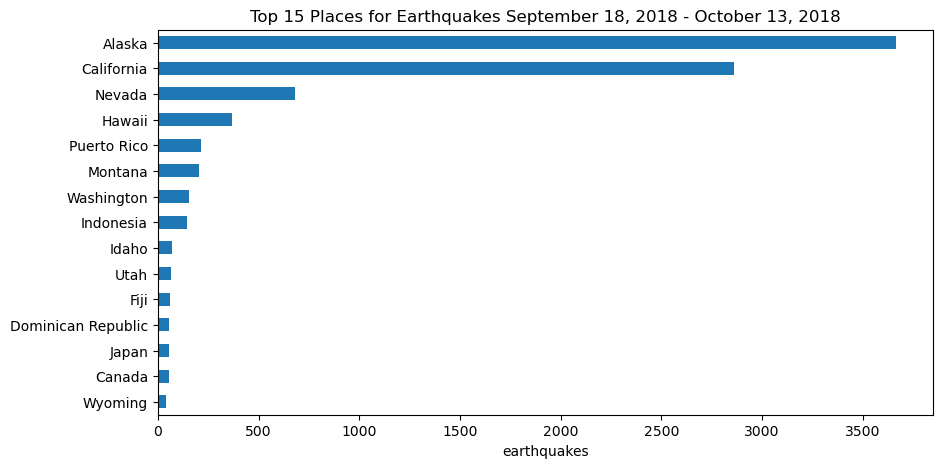

In [64]:
quakes.parsed_place.value_counts().iloc[14::-1,].plot(
    kind='barh', figsize=(10,5),
    title='Top 15 Places for Earthquakes September 18, 2018 - October 13, 2018'
)
plt.xlabel('earthquakes')

Text(0.5, 0, 'tsunamis')

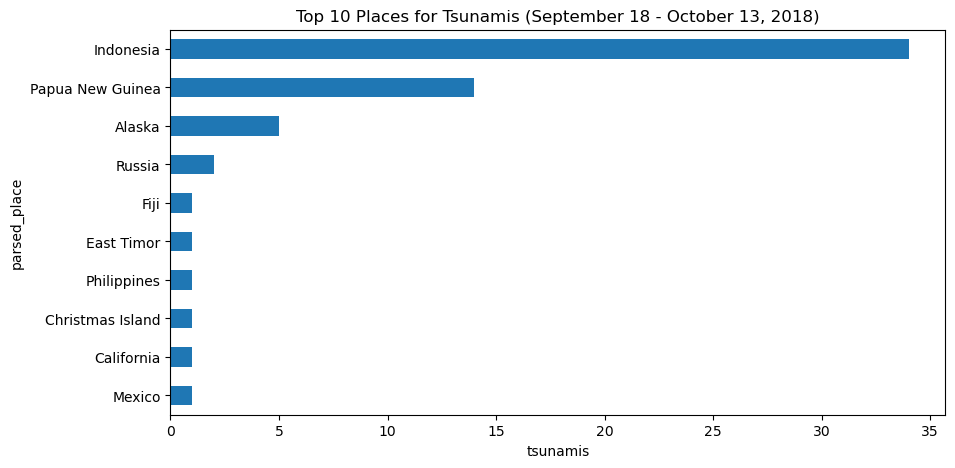

In [68]:
quakes.groupby(
    'parsed_place'
).tsunami.sum().sort_values().iloc[-10:,].plot(
    kind='barh', figsize=(10,5),
    title='Top 10 Places for Tsunamis (September 18 - October 13, 2018)'
)
plt.xlabel('tsunamis')

/var/folders/gg/0m4l7pvs5zq9d8p4tzflypdc0000gn/T/ipykernel_48410/3030065598.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).set_index('time').resample('1D').sum()


Text(0, 0.5, 'count')

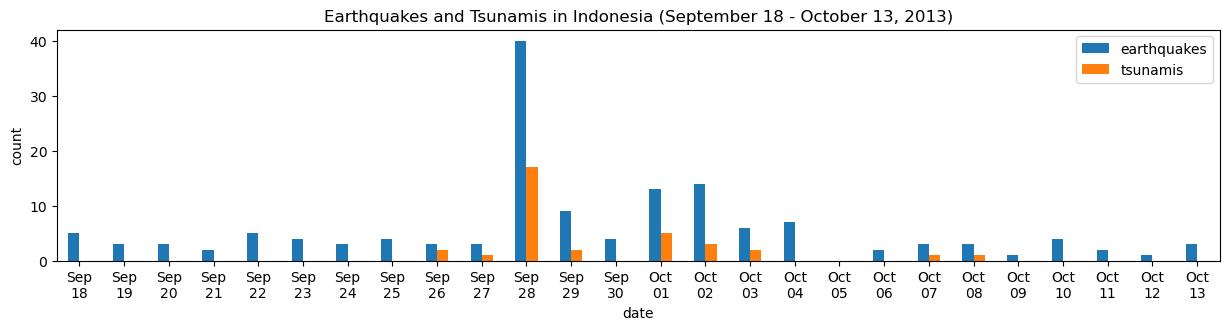

In [71]:
indonesia_quakes = quakes.query(
    'parsed_place == "Indonesia"'
).assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake','tsunami'], kind='bar', rot=0,
    figsize=(15,3), label=['earthquakes','tsunamis'],
    title='Earthquakes and Tsunamis in Indonesia (September 18 - October 13, 2013)'
)

plt.xlabel('date')
plt.ylabel('count')

In [70]:
indonesia_quakes

,mag,tsunami,earthquake
time,,,
2018-09-18,22.1,0,5
2018-09-19,13.1,0,3
2018-09-20,12.8,0,3
2018-09-21,8.9,0,2
2018-09-22,23.1,0,5
2018-09-23,18.2,0,4
2018-09-24,13.4,0,3
2018-09-25,17.1,0,4
2018-09-26,14.2,2,3


Text(0, 0.5, '')

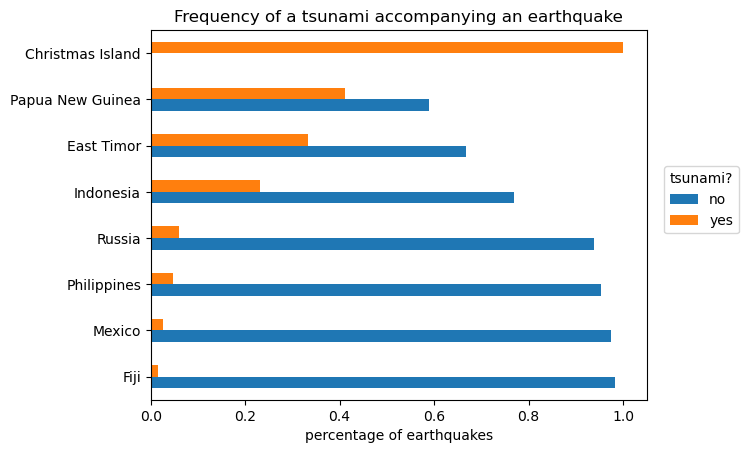

In [86]:
(quakes.groupby(['parsed_place', 'tsunami']).mag.count()
 .unstack().apply(lambda df_: df_/df_.sum(), axis=1)
 .rename(columns={0:'no', 1:'yes'})
 .sort_values('yes', ascending=False)[7::-1]
 .plot.barh(
     title='Frequency of a tsunami accompanying an earthquake'
 )
)
plt.legend(title='tsunami?', bbox_to_anchor=(1.2, 0.65))
plt.xlabel('percentage of earthquakes')
plt.ylabel('')

Text(0, 0.5, 'earthquakes')

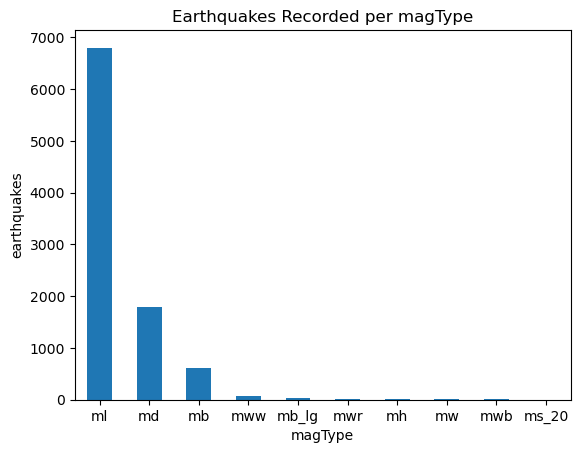

In [87]:
quakes.magType.value_counts().plot(
    kind='bar', rot=0,
    title='Earthquakes Recorded per magType'
)

plt.xlabel('magType')
plt.ylabel('earthquakes')

In [88]:
pivot = quakes.assign(
    mag_bin=lambda x: np.floor(x.mag)
).pivot_table(
    index='mag_bin',
    columns='magType',
    values='mag',
    aggfunc='count'
)

Text(0, 0.5, 'earthquakes')

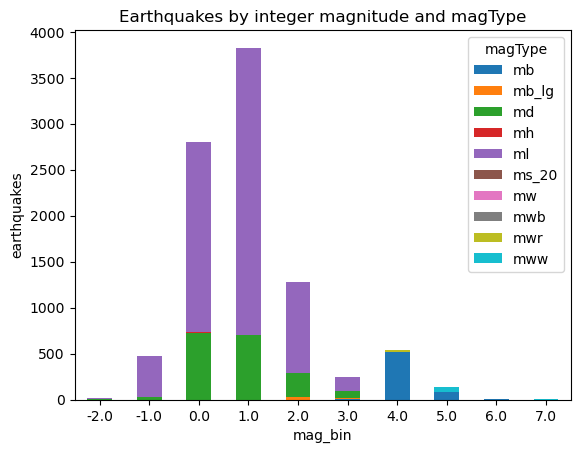

In [90]:
pivot.plot.bar(
    stacked=True,
    rot=0,
    title='Earthquakes by integer magnitude and magType'
)

plt.ylabel('earthquakes')

Text(0, 0.5, 'percentage')

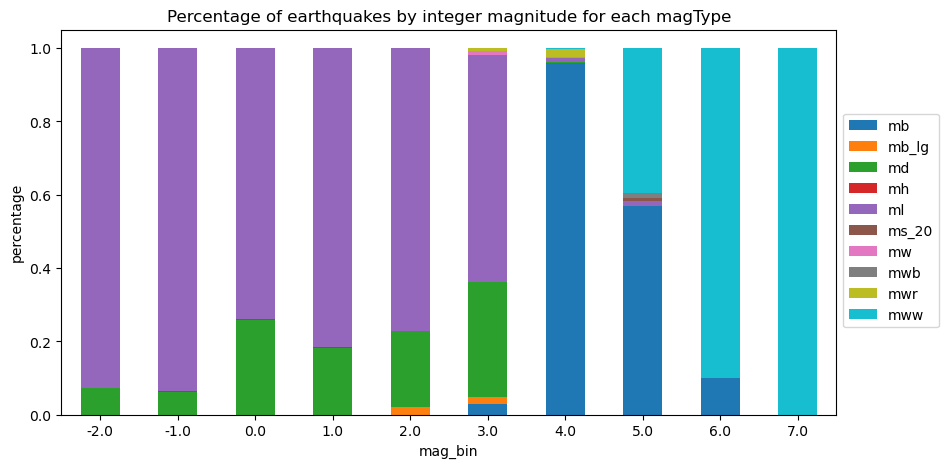

In [91]:
normalized_pivot = pivot.fillna(0).apply(lambda x: x/x.sum(), axis=1)

ax = normalized_pivot.plot.bar(
    stacked=True, rot=0, figsize=(10,5),
    title='Percentage of earthquakes by integer magnitude for each magType'
)

ax.legend(bbox_to_anchor=(1,0.8))
plt.ylabel('percentage')

Text(0, 0.5, '')

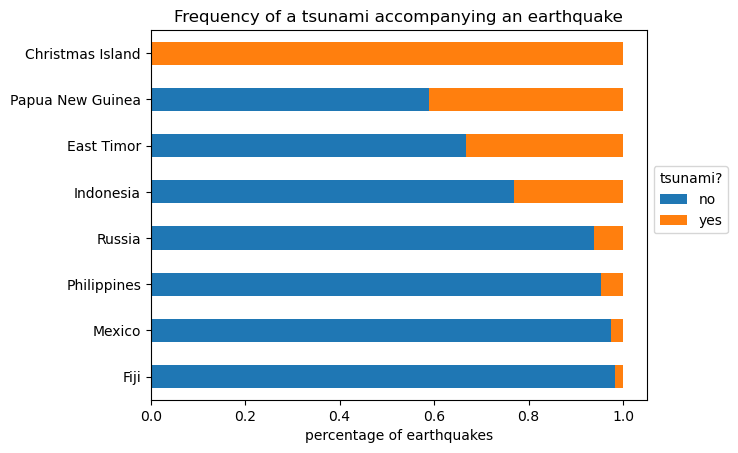

In [94]:
(quakes.groupby(['parsed_place','tsunami']).mag.count()
.unstack().apply(lambda x: x/x.sum(), axis=1)
.rename(columns={0:'no',1:'yes'})
.sort_values('yes', ascending=False)[7::-1]
.plot.barh(
    title='Frequency of a tsunami accompanying an earthquake',
    stacked=True
)
)

plt.legend(title='tsunami?', bbox_to_anchor=(1,0.65))
plt.xlabel('percentage of earthquakes')
plt.ylabel('')

## The `pandas.plotting` module

In [95]:
# pg 312 (317 of PDF)